## Upper Confidence Bound

Importing the libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [59]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


Implementing the UCB model

In [60]:
import math
N = 10000
d = 10
selections = []
eachAdSelections = [0] * d
adsRewards = [0] * d
#totalRewards = 0

for n in range (0, N):
 ad = 0
 maxUpperBound = 0
 for i in range (0, d):
   if eachAdSelections[i] != 0:
    averageReward = adsRewards[i]/eachAdSelections[i]
    delta = math.sqrt (3/2 * math.log(n+1) / eachAdSelections[i])
    upperBound = averageReward + delta
   else:
    upperBound = 1e400
   if maxUpperBound < upperBound :
    maxUpperBound = upperBound
    ad = i

 selections.append(ad)
 eachAdSelections[ad] += 1
 if dataset.values[n, ad] == 1 :
    adsRewards[ad] += 1
    #totalRewards +=1

In [61]:
eachAdSelections

[705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]

Visualizing the results

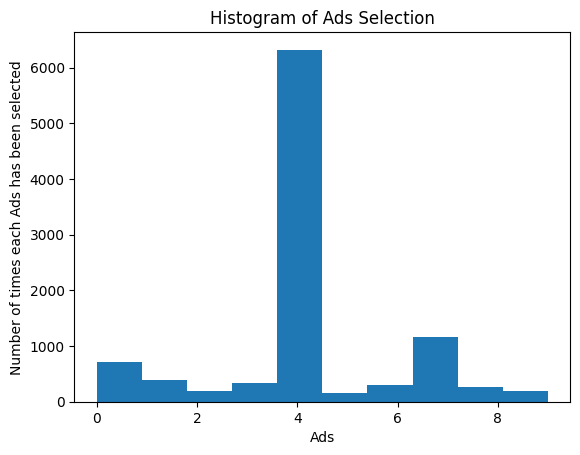

In [62]:
plt.hist(selections)
plt.title('Histogram of Ads Selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each Ads has been selected')
plt.show()